In [5]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_excel('flyzy.xlsx')

In [5]:
data

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.00000,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.00000,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.00000,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.00000,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.00000,3.806206,0.019638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1265781,Airline D,395,Airport 2,Airport 3,0,6,1,Type B,0.190018,1.00000,2.451216,0.283440,1
2996,5440150,Airline E,547,Airport 1,Airport 4,22,4,7,Type E,0.719271,91.00000,0.027039,0.665294,1
2997,779080,Airline C,461,Airport 1,Airport 3,8,3,1,Type B,0.458724,3.00000,1.131315,0.991307,0
2998,4044431,Airline B,464,Airport 3,Airport 3,5,5,3,Type E,0.443373,46.00000,0.968651,0.254808,1


In [8]:
data.isnull().sum()

Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64

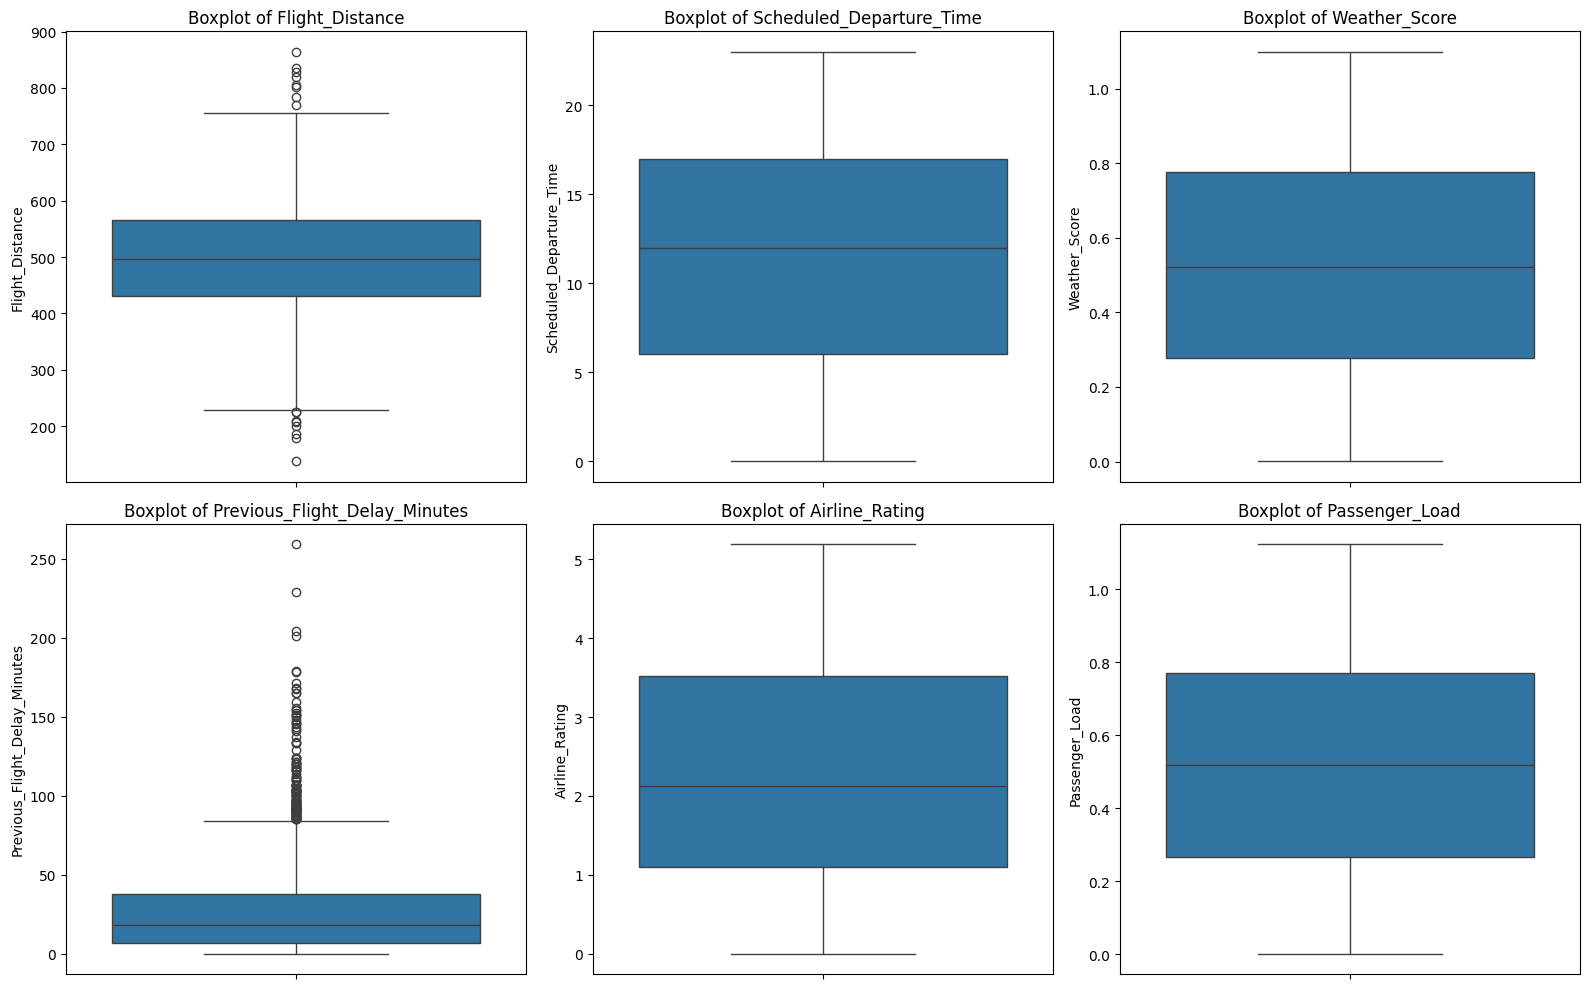

In [9]:
df=data=pd.read_excel('flyzy.xlsx')
# Visualize the distribution and check for outliers using boxplots for continuous variables
plt.figure(figsize=(16, 10))

# Continuous variables to analyze
continuous_vars = ['Flight_Distance', 'Scheduled_Departure_Time', 'Weather_Score', 
                   'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load']

#boxplots
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot of {var}')
    
plt.tight_layout()
plt.show()

# Calculating Z-scores to identify outliers numerically
z_scores = np.abs((df[continuous_vars] - df[continuous_vars].mean()) / df[continuous_vars].std())
outliers = (z_scores > 3).sum()


In [10]:
# Capping outliers in 'Flight_Distance' and 'Previous_Flight_Delay_Minutes' at the 1st and 99th percentiles

# Define the columns to cap
columns_to_cap = ['Flight_Distance', 'Previous_Flight_Delay_Minutes']

# Calculate the 1st and 99th percentiles
lower_cap = df[columns_to_cap].quantile(0.01)
upper_cap = df[columns_to_cap].quantile(0.99)

# Cap the outliers
df_capped = df.copy()
df_capped[columns_to_cap] = df[columns_to_cap].clip(lower=lower_cap, upper=upper_cap, axis=1)

# Check if the capping was successful by re-calculating the outliers
z_scores_capped = np.abs((df_capped[columns_to_cap] - df_capped[columns_to_cap].mean()) / df_capped[columns_to_cap].std())
outliers_after_capping = (z_scores_capped > 3).sum()


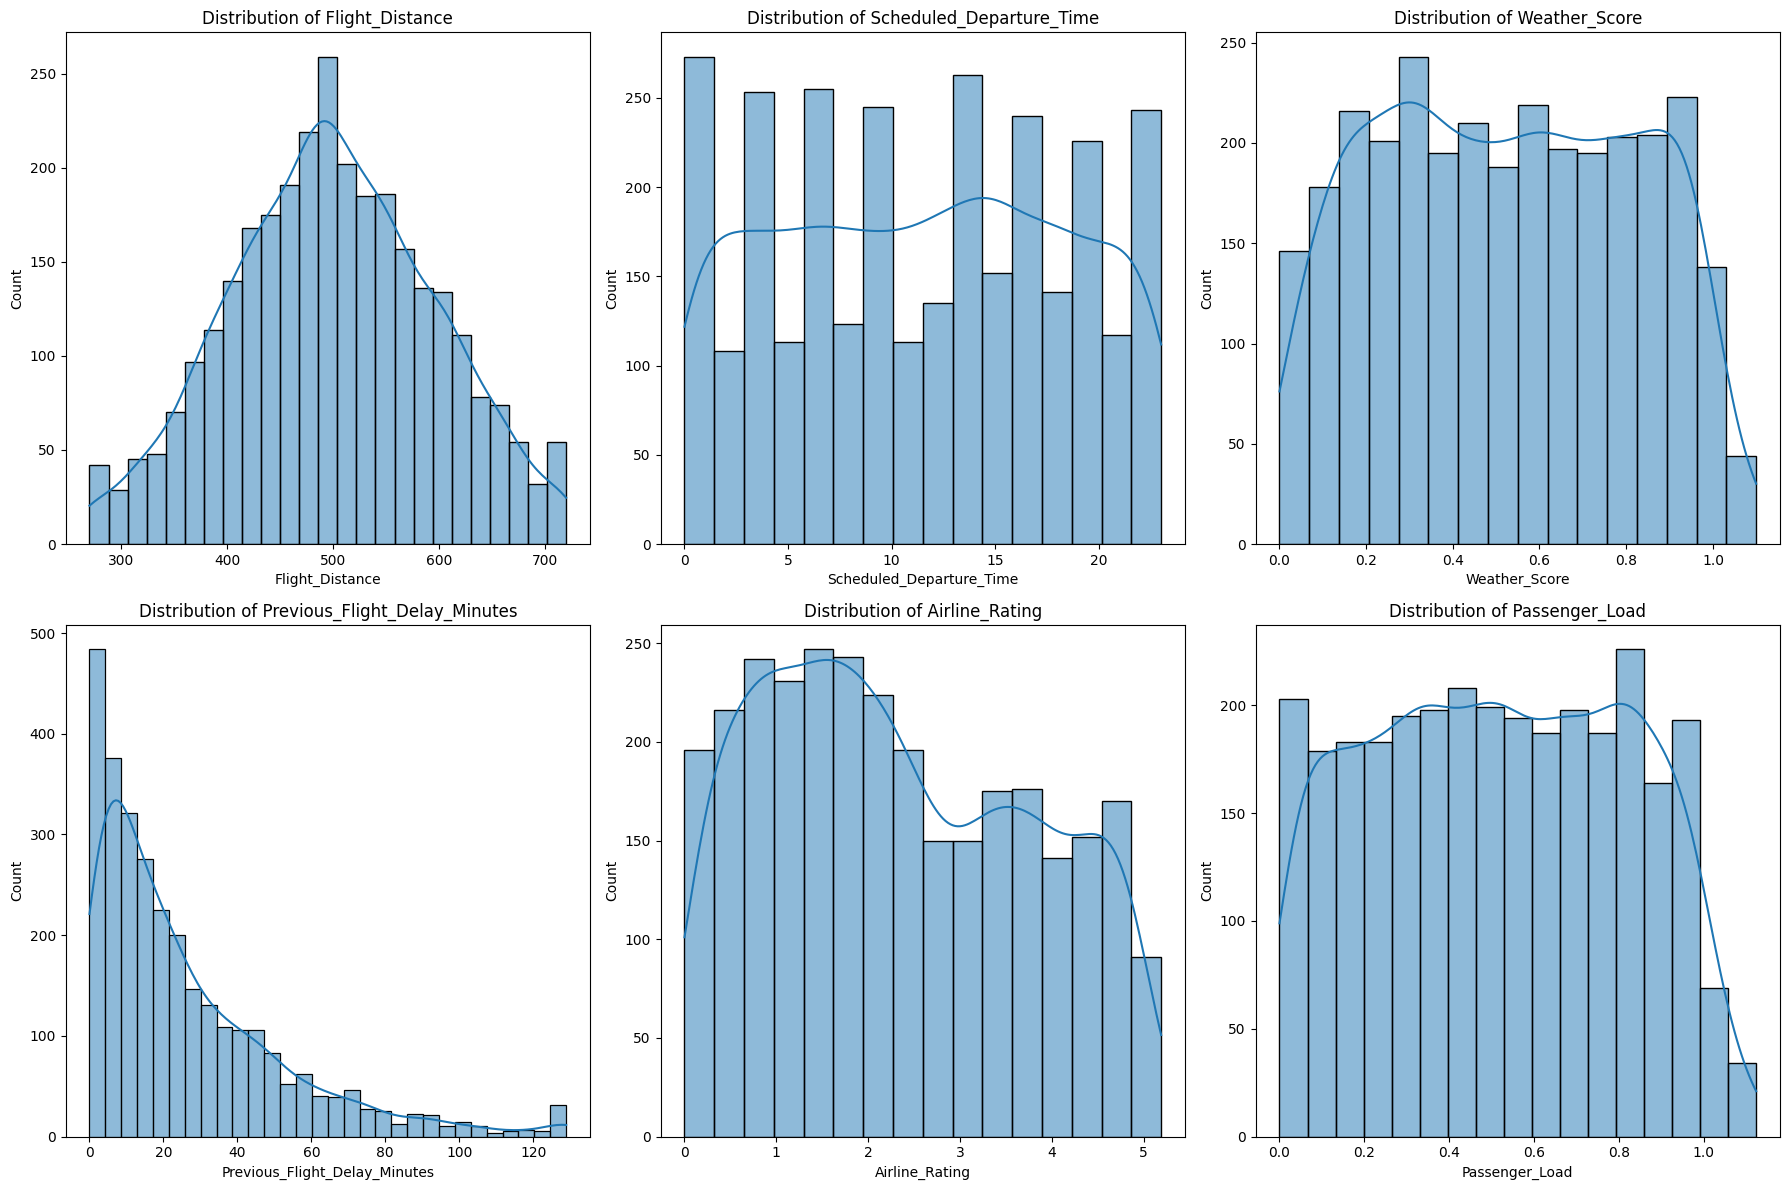

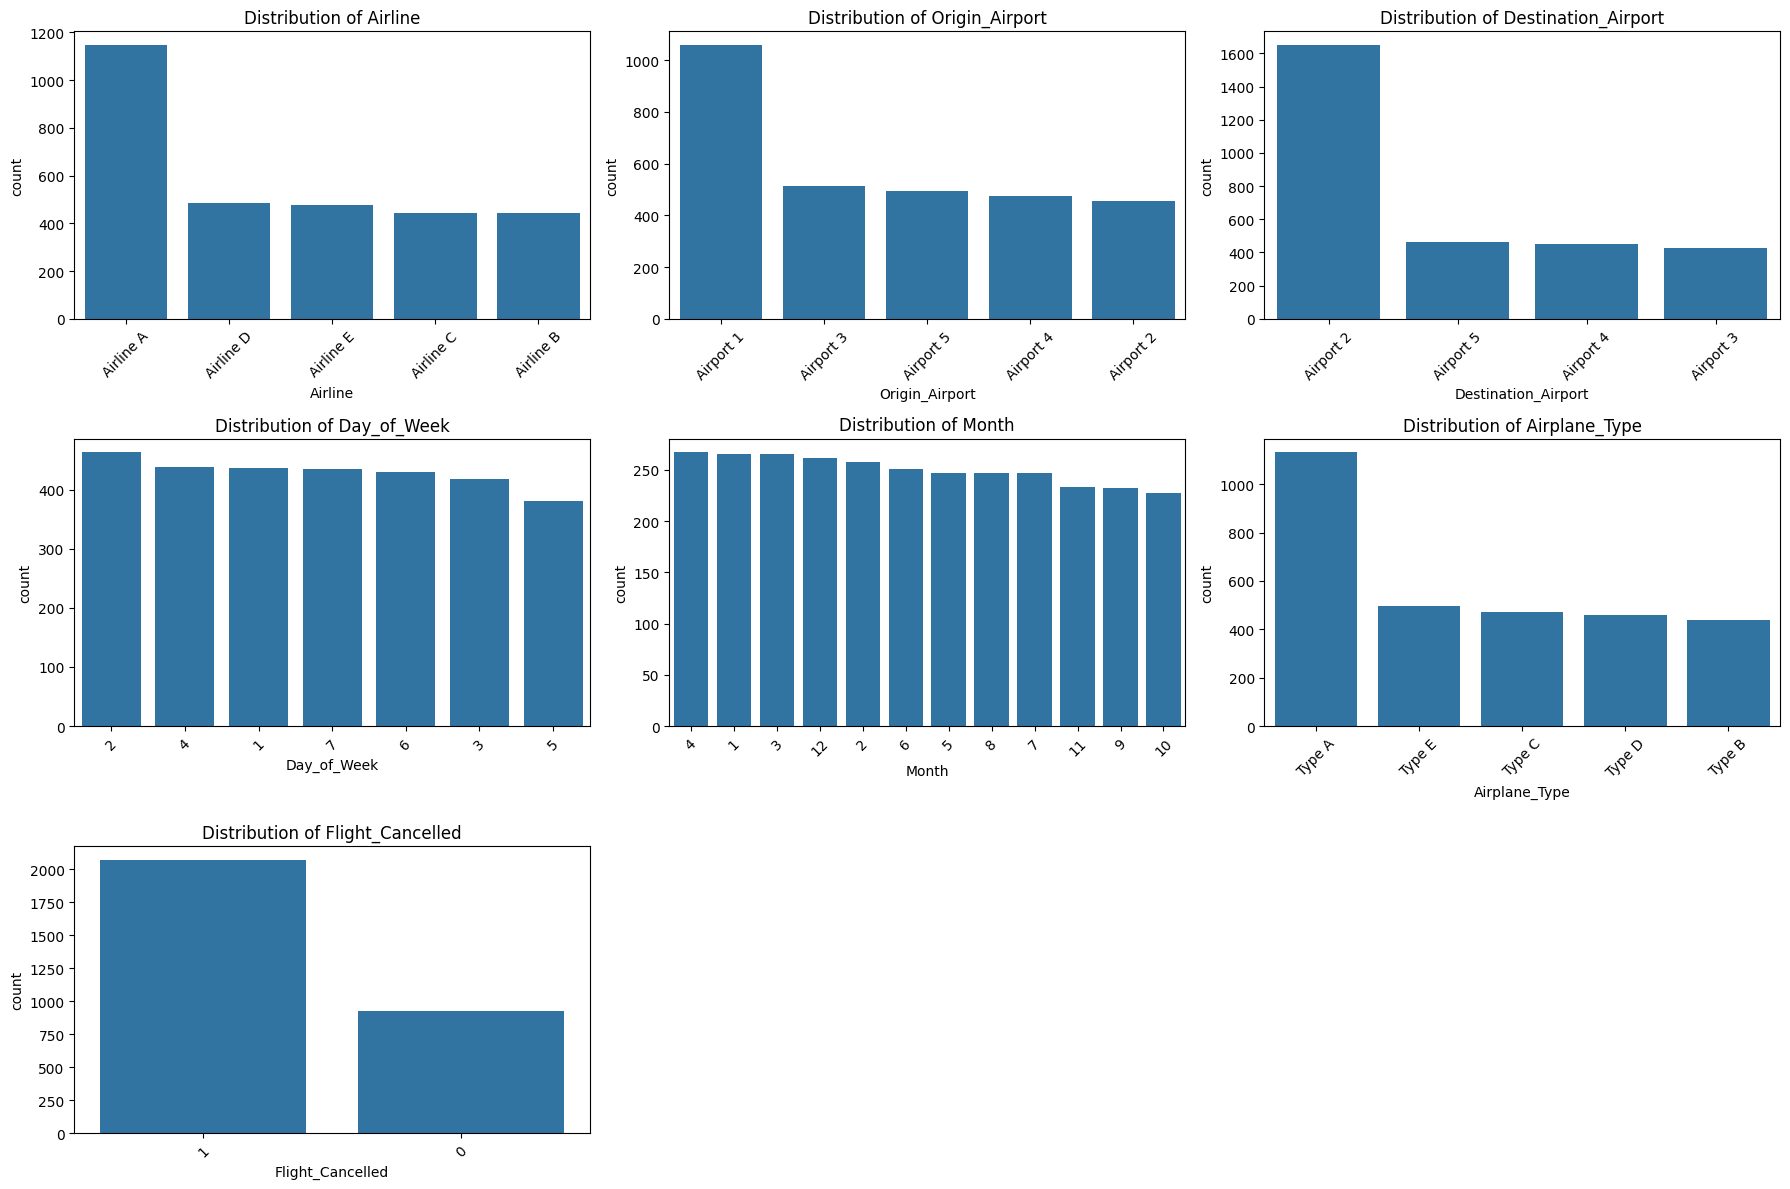

In [11]:
# Univariate Analysis: Continuous Variables

plt.figure(figsize=(18, 12))

# Plot histograms for continuous variables
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_capped[var], kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

# Univariate Analysis: Categorical Variables
categorical_vars = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Day_of_Week', 'Month', 'Airplane_Type', 'Flight_Cancelled']

plt.figure(figsize=(18, 12))

# Plot bar charts for categorical variables
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_capped, x=var, order=df_capped[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [12]:
print(df.dtypes)

Flight ID                          int64
Airline                           object
Flight_Distance                    int64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type                     object
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
dtype: object


In [19]:
# Convert the scheduled_departure_time column to datatime
# Assuming the current column is in a standard format that can be inferred

data['Scheduled_Departure_Time'] = pd.to_datetime(data['Scheduled_Departure_Time'], errors='coerce', unit='s')

In [21]:
# Check the conversion
data[['Scheduled_Departure_Time']]

,Scheduled_Departure_Time
0,1970-01-01 00:00:04
1,1970-01-01 00:00:12
2,1970-01-01 00:00:17
3,1970-01-01 00:00:01
4,1970-01-01 00:00:19
...,...
2995,1970-01-01 00:00:00
2996,1970-01-01 00:00:22
2997,1970-01-01 00:00:08
2998,1970-01-01 00:00:05
